# <center> CSE3024 Week 12 - Challenging Task </center>
# Faraz Suhail
# 19BCE1525

## Q2. Implement a suitable community detection algorithm for the detection and analysis of community structure for the following network graph datasets. Show the communities using graph coloring technique. 

In [50]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

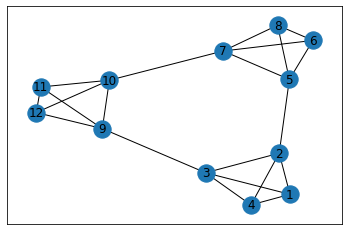

In [51]:
G = nx.Graph()
G.add_edges_from([('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'),
                ('2', '4'), ('2', '5'), ('3', '4'), ('3', '9'),
                ('5', '6'), ('5', '7'), ('5', '8'), ('6', '7'),
                ('6', '8'), ('7', '8'), ('7', '10'), ('9', '10'),
                ('9', '11'), ('9', '12'), ('10', '11'), ('10', '12'), ('11', '12')])

plt.figure()
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)

In [52]:
communities = girvan_newman(G)
nodes = []

for com in next(communities):
    nodes.append(list(com))

for i in range(len(nodes)):
    print("Community",(i+1),": ",nodes[i])

Community 1 :  ['3', '2', '4', '1']
Community 2 :  ['10', '9', '12', '5', '7', '11', '8', '6']


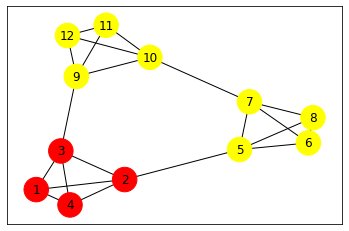

In [53]:
for i in range(len(nodes)):
    color_map = []
    for node in G:
        if node in nodes[0]:
            color_map.append('red')
        else: 
            color_map.append('yellow') 
            
graph = nx.draw_networkx(G,node_size=600,node_color=color_map)
plt.show()

## Q1. Write a Python program to classify the given twitter dataset describing tweets on U.S airlines into positive, neutral and negative classes. Use suitable Naïve Bayes classification technique. (dataset given).

· Apply Text pre-processing task

· Train and test the dataset

· Show the confusion matrix.

· Compute Accuracy, Precision, Recall and F-score

In [38]:
from enum import unique
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
words = []
sentences = []
word_size_class = {}
word_frequency_label = {}

In [40]:
def load_data(filename):
    data = pd.read_csv(filename)
    test_index = data['airline_sentiment'] == '?'
    training_data = data[-test_index]
    testing_data = data[test_index]   
    testing_data.reset_index(inplace = True, drop = True) 
    return (training_data,testing_data)

def find_vocab_size(training_data):
    for index,sent in enumerate(training_data['text']):
        ext_words = re.findall(r"([a-z0-9]+)",sent)
        label = training_data['airline_sentiment'][index]
        word_size_class[label] = word_size_class.get(label,0) + len(ext_words)
        words.extend(ext_words)
        sentences.append(ext_words)
    unique_words_count = len(set(words))
    words_count = len(words)

    global unique_words
    unique_words = list(set(words))

    return (unique_words_count,words_count)

In [41]:
def find_prior_probabilties(training_data): 
    class_prior = {}
    labels = training_data['airline_sentiment'].unique()   
    total = len(training_data)
    for l in labels:
        class_prior[l] = sum(training_data['airline_sentiment'] == l) / total
    return class_prior


def find_word_frequency_class(training_data):   
    for word in unique_words:
        for index,sent_vec in enumerate(sentences):
            if word in sent_vec:            
                if word not in word_frequency_label:
                    word_frequency_label[word] = {}
                label = training_data['airline_sentiment'][index]
                word_frequency_label[word][label] = word_frequency_label[word].get(label,0) + sent_vec.count(word) 

In [42]:
def display_conditional_prob(vocab_size,labels):
    i=0
    for word in word_frequency_label:
        
        for label in labels:
            num = word_frequency_label[word].get(label,0) + 1
            denom = word_size_class[label] + vocab_size
            space = " "
            print(f"P({word}/{label}) = {num}/{denom} {space*(14-len(word))}",end="\t")

        print()   
   
def display_test_results(data,labels,vocab_size,class_prior):
    for i,sent in enumerate(data['text']):
        ext_words = re.findall(r"([a-z0-9]+)",sent)
        
        probs = []
        for label in labels:
            prob = 1
            for word in ext_words:
                
                class_dict = word_frequency_label.get(word)
                
                num = 0
                denom = (word_size_class[label]+vocab_size)

                if class_dict == None:
                    num = 1
                else:                    
                    num = class_dict.get(label,0) + 1

                #print(f"{num}/{denom} ({word})  ",end=" ")
                prob *= (num/denom) 
            #print(f"{label}\n")  

            prior = class_prior[label]
            probs.append(prior*prob)
        
        probs = np.array(probs, dtype=np.float32)

        index = np.argmax(probs)
        print(f"\n{sent} ===> {labels[index]}  {probs}")
        data['airline_sentiment'][i] = labels[index]
    
    print("\nFinal Result:")
    print(data)

In [43]:
train_data,test_data = load_data("Tweets Dataset.csv")
print("Training Data:")
train_data.head(6)

Training Data:


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-15 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-15 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-15 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-15 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-15 11:14,NaN,Pacific Time (US & Canada)
5,5.700000e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24-02-15 11:14,NaN,Pacific Time (US & Canada)


In [44]:
labels = train_data['airline_sentiment'].unique()
class_prior = find_prior_probabilties(train_data)
print(f"\nPrior Probabilities: {class_prior}\n")


Prior Probabilities: {'neutral': 0.2967032967032967, 'positive': 0.29304029304029305, 'negative': 0.41025641025641024}



In [45]:
vocab_size, total_word_count = find_vocab_size(train_data)
print(f"Vocab size: {vocab_size}")
print(f"Total words in train data: {total_word_count}\n")

Vocab size: 1305
Total words in train data: 4704



In [46]:
find_word_frequency_class(train_data)
print("Formed a dictionary of words with respect to their frequency and class\n")   
print('\nDisplaying all the conditional Probabilities:')
display_conditional_prob(vocab_size,labels)

Formed a dictionary of words with respect to their frequency and class


Displaying all the conditional Probabilities:
P(ays/neutral) = 1/2547            	P(ays/positive) = 2/2530            	P(ays/negative) = 1/3542            	
P(travel/neutral) = 2/2547         	P(travel/positive) = 4/2530         	P(travel/negative) = 2/3542         	
P(support/neutral) = 1/2547        	P(support/positive) = 2/2530        	P(support/negative) = 2/3542        	
P(match/neutral) = 2/2547          	P(match/positive) = 3/2530          	P(match/negative) = 2/3542          	
P(338/neutral) = 1/2547            	P(338/positive) = 1/2530            	P(338/negative) = 2/3542            	
P(henever/neutral) = 1/2547        	P(henever/positive) = 1/2530        	P(henever/negative) = 2/3542        	
P(rep/neutral) = 1/2547            	P(rep/positive) = 3/2530            	P(rep/negative) = 1/3542            	
P(ulles/neutral) = 1/2547          	P(ulles/positive) = 1/2530          	P(ulles/negative) = 3/3542     

P(change/neutral) = 4/2547         	P(change/positive) = 2/2530         	P(change/negative) = 4/3542         	
P(if/neutral) = 5/2547             	P(if/positive) = 2/2530             	P(if/negative) = 2/3542             	
P(acquiao/neutral) = 3/2547        	P(acquiao/positive) = 1/2530        	P(acquiao/negative) = 1/3542        	
P(ec/neutral) = 2/2547             	P(ec/positive) = 1/2530             	P(ec/negative) = 1/3542             	
P(udapest/neutral) = 2/2547        	P(udapest/positive) = 1/2530        	P(udapest/negative) = 1/3542        	
P(enter/neutral) = 1/2547          	P(enter/positive) = 1/2530          	P(enter/negative) = 2/3542          	
P(seat/neutral) = 2/2547           	P(seat/positive) = 1/2530           	P(seat/negative) = 8/3542           	
P(death/neutral) = 2/2547          	P(death/positive) = 1/2530          	P(death/negative) = 1/3542          	
P(bit/neutral) = 1/2547            	P(bit/positive) = 1/2530            	P(bit/negative) = 2/3542            	
P

P(hung/neutral) = 1/2547           	P(hung/positive) = 1/2530           	P(hung/negative) = 2/3542           	
P(start/neutral) = 2/2547          	P(start/positive) = 2/2530          	P(start/negative) = 1/3542          	
P(rab/neutral) = 2/2547            	P(rab/positive) = 1/2530            	P(rab/negative) = 1/3542            	
P(p4/neutral) = 2/2547             	P(p4/positive) = 1/2530             	P(p4/negative) = 1/3542             	
P(pleasecomeback/neutral) = 1/2547 	P(pleasecomeback/positive) = 2/2530 	P(pleasecomeback/negative) = 1/3542 	
P(problems/neutral) = 1/2547       	P(problems/positive) = 1/2530       	P(problems/negative) = 3/3542       	
P(jessicajaymes/neutral) = 1/2547  	P(jessicajaymes/positive) = 2/2530  	P(jessicajaymes/negative) = 1/3542  	
P(i4/neutral) = 1/2547             	P(i4/positive) = 2/2530             	P(i4/negative) = 1/3542             	
P(marketing/neutral) = 2/2547      	P(marketing/positive) = 1/2530      	P(marketing/negative) = 1/3542      	
P

In [47]:
print("\nResult on test sentences:")
display_test_results(test_data,labels,vocab_size,class_prior)


Result on test sentences:

Final Result:
Empty DataFrame
Columns: [tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone]
Index: []


In [48]:
X = train_data.iloc[:, [2, 9]].values
y = train_data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(X_test)
print("Predicted Values\n",y_pred)

Predicted Values
 ['negative' 'negative' 'negative' 'neutral' 'negative' 'negative'
 'negative' 'negative' 'neutral' 'negative' 'neutral' 'negative'
 'negative' 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'negative' 'negative'
 'neutral' 'negative' 'negative' 'negative' 'neutral' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'negative' 'negative'
 'positive' 'neutral' 'negative' 'negative']


In [49]:
print("Accuracy", accuracy_score(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))

Accuracy 0.4
Confusion Matrix
 [[19  7  0]
 [ 7  2  0]
 [13  6  1]]
